<a href="https://colab.research.google.com/github/ckyriakos/Thesis--BI-through-ML-from-Satellite-Data/blob/main/Fishnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
try:
    import geemap, ee,eemont,geopandas
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
        !pip install eemont
        !pip install geopandas
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
        !mamba install eemont -c conda-forge -y
        !mamba install geopandas -c conda-forge -y
    import geemap, ee,eemont,geopandas
    

package not found, installing w/ pip in Google Colab...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 34.3 MB/s 
     |████████████████████████████████| 6.3 MB 56.9 MB/s 


In [ ]:
try:
        geemap.ee_initialize()
except Exception as e:
        geemap.ee_initialize()
        geemap.ee_initialize()



In [21]:
import numpy as  np
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [56]:
## Manually select some polygons to add in my Feature Collection

In [4]:
### S

kount_fil = ee.Geometry.Polygon([
          [
            22.952406182885166,
            39.35917348693331
          ],
          [
            22.952624447643757,
            39.359061499184136
          ],
          [
            22.952531576156613,
            39.35895702896919
          ],
          [
            22.952297888696194,
            39.35905890687299
          ],
          [
            22.952407523989677,
            39.359176597701556
          ]
        ])
kount_mavro = ee.Geometry.Polygon([
          [
            22.951523065567017,
            39.35919215154071
          ],
          [
            22.951737642288208,
            39.35908016382146
          ],
          [
            22.951886504888535,
            39.3592429607245
          ],
          [
            22.95165583491325,
            39.35935598510286
          ],
          [
            22.951521389186382,
            39.35919085538758
          ]
        ])

fil_28okt = ee.Geometry.Polygon( [
          [
            22.95275218784809,
            39.35951204139807
          ],
          [
            22.952881939709187,
            39.35942908792906
          ],
          [
            22.95277565717697,
            39.35932072981181
          ],
          [
            22.95261740684509,
            39.35940160957075
          ],
          [
            22.952740788459778,
            39.359515670610094
          ]
        ])

fill_28okt2 = ee.Geometry.Polygon([
          [
            22.95280247926712,
            39.359597846288914
          ],
          [
            22.95294027775526,
            39.35953174283249
          ],
          [
            22.9528571292758,
            39.359441271726006
          ],
          [
            22.95270960777998,
            39.35952889130942
          ],
          [
            22.952714301645756,
            39.35956570187087
          ],
          [
            22.952717654407024,
            39.35957736718557
          ],
          [
            22.952751852571964,
            39.35956777570473
          ],
          [
            22.952791415154934,
            39.35959499476857
          ],
          [
            22.95280247926712,
            39.359595253997696
          ],
          [
            22.952802814543247,
            39.35960017935096
          ],
          [
            22.95280449092388,
            39.359598883205386
          ]
        ])

# not abandoned
fil_fer = ee.Geometry.Polygon([
          [
            22.95489829033613,
            39.361775077721575
          ],
          [
            22.954826205968857,
            39.361703014235744
          ],
          [
            22.954844646155834,
            39.36168823861977
          ],
          [
            22.95478966087103,
            39.361634320555964
          ],
          [
            22.95481715351343,
            39.361614360492915
          ],
          [
            22.954944893717766,
            39.36154437061647
          ],
          [
            22.955089397728443,
            39.3616892755052
          ],
          [
            22.954903990030285,
            39.361783632015296
          ],
          [
            22.954898625612255,
            39.36177715148985
          ]
        ])

fil_fer_apenanti = ee.Geometry.Polygon([
          [
            22.955063581466675,
            39.362018745072554
          ],
          [
            22.955232560634613,
            39.361943052752395
          ],
          [
            22.95509308576584,
            39.36182692190997
          ],
          [
            22.95496568083763,
            39.36189742994447
          ],
          [
            22.955056875944138,
            39.36201148690843
          ]
        ])
#not abandoned
konst_gamv = ee.Geometry.Polygon( [
          [
            22.95320212841034,
            39.36192127823414
          ],
          [
            22.953552156686783,
            39.36170871710425
          ],
          [
            22.95335903763771,
            39.36154488906026
          ],
          [
            22.95302912592888,
            39.361739823651455
          ],
          [
            22.953198105096817,
            39.36191816758813
          ]
        ])

poi_oikonomaki= ee.Geometry.Polygon([[[
              22.949098348617554,39.35979978548018],
            [22.951193153858185,39.35979978548018 ],
            [22.951193153858185,39.36196275350115],
            [22.949098348617554,39.36196275350115],
            [22.949098348617554,39.35979978548018]]])

In [57]:
## Create feature collection, and add a pivot for the getTimeSeriesByRegions function

In [5]:
volos_piv = ee.FeatureCollection([
    ee.Feature(konst_gamv,{'pivot':0}),
    ee.Feature(fil_fer_apenanti,{'pivot':1}),
   ee.Feature(fil_fer,{'pivot':2}),
    ee.Feature(fill_28okt2,{'pivot':3}),
    ee.Feature(fil_28okt,{'pivot':4}),
   ee.Feature(kount_mavro,{'pivot':5}),
    ee.Feature(poi_oikonomaki,{'pivot':6}),
   ee.Feature(kount_fil,{'pivot':7}),
    ])



In [12]:
#EXAMPLE


pivots = ee.FeatureCollection([
    ee.Feature(ee.Geometry.Point([27.724856,26.485040]).buffer(400),{'pivot':0}),
    ee.Feature(ee.Geometry.Point([27.719427,26.478505]).buffer(400),{'pivot':1}),
    ee.Feature(ee.Geometry.Point([27.714185,26.471802]).buffer(400),{'pivot':2})
])

L8 = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
      .filterBounds(volos_piv)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['EVI','GNDVI']))

print('done collecting')
ts = L8.getTimeSeriesByRegions(collection = volos_piv,
                               bands = ['EVI','GNDVI'],
                               reducer = [ee.Reducer.mean()],
                               scale = 30)
print('done specifying ts')
tsPandas = geemap.ee_to_pandas(ts)
print('done calculating ts')
tsPandas[tsPandas == -9999] = np.nan
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)

done collecting
done specifying ts
done calculating ts


In [13]:
tsPandas

,date,pivot,EVI,reducer,GNDVI
0,2013-04-14 09:06:32,0,0.119047,mean,0.215639
1,2013-04-14 09:06:32,1,0.097935,mean,0.207132
2,2013-04-14 09:06:32,2,0.067252,mean,0.138354
3,2013-04-14 09:06:32,3,0.118722,mean,0.271195
4,2013-04-14 09:06:32,4,0.112403,mean,0.253925
...,...,...,...,...,...
4323,2021-12-23 09:11:13,3,NaN,mean,NaN
4324,2021-12-23 09:11:13,4,NaN,mean,NaN
4325,2021-12-23 09:11:13,5,0.068460,mean,0.203459
4326,2021-12-23 09:11:13,6,0.055157,mean,0.153064


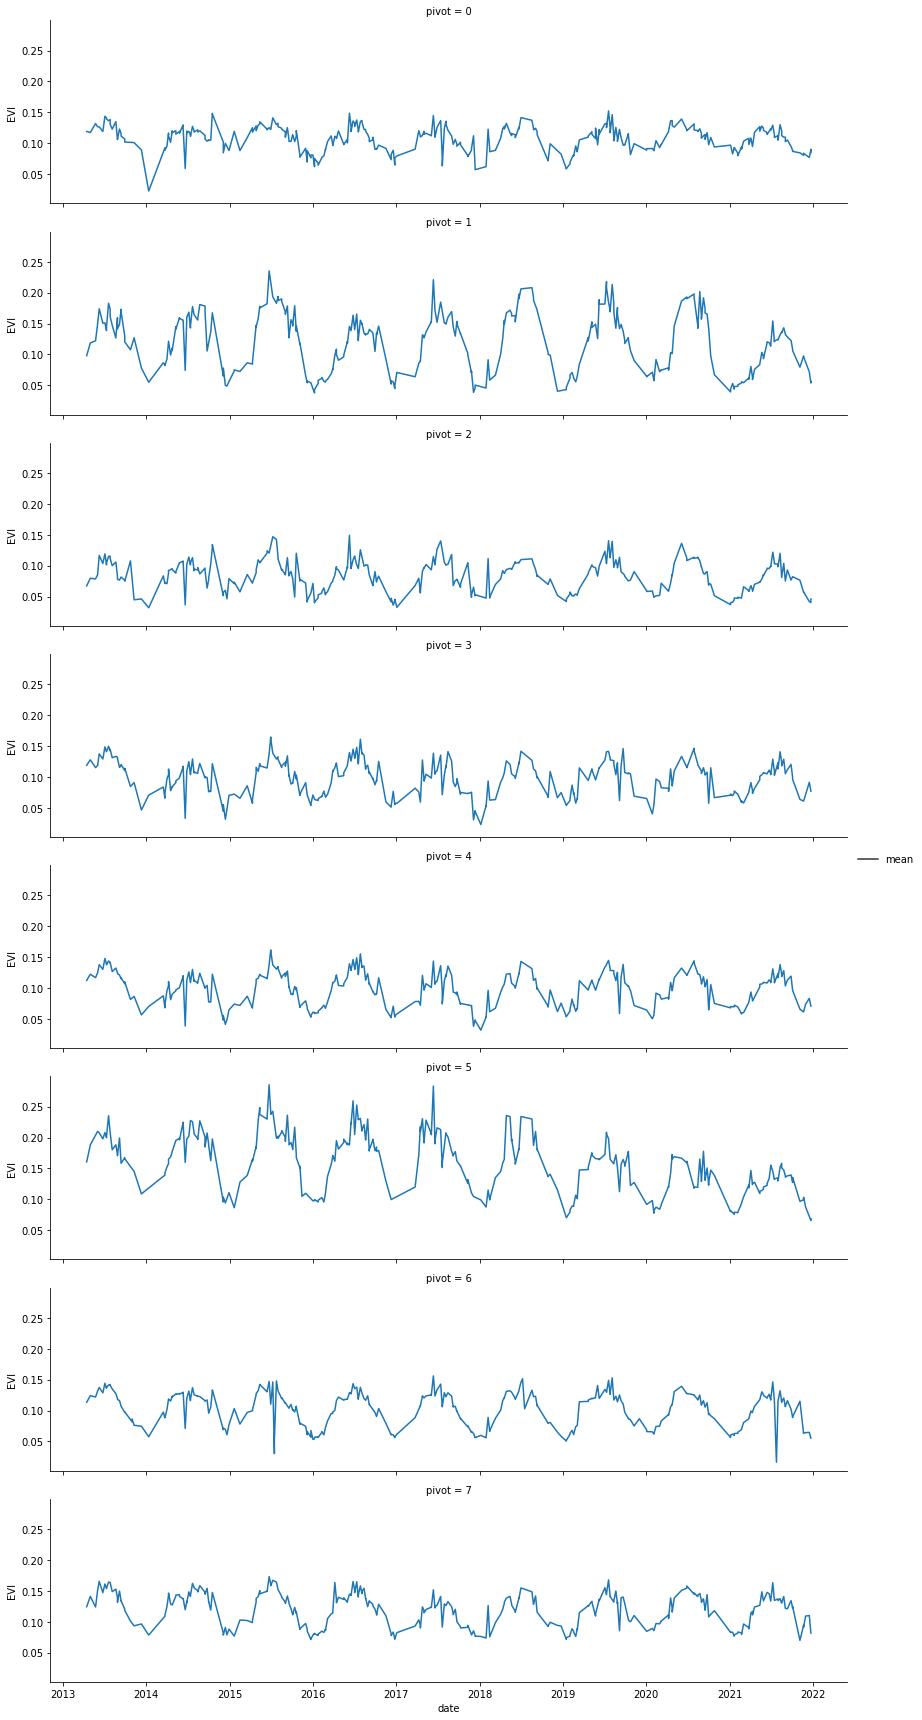

In [14]:
g = sns.FacetGrid(tsPandas,row = 'pivot',height = 3,aspect = 4)
g.map_dataframe(sns.lineplot,x = 'date',y = 'EVI',style = 'reducer')
g.add_legend()

In [24]:
filepath  = 'https://raw.githubusercontent.com/ckyriakos/Thesis--BI-through-ML-from-Satellite-Data/master/volos_municipality.geojson'


In [16]:
filepath

'https:/raw.githubuser.com/ckyriakos/Thesis--BI-through-ML-from-Satellite-Data/volos_municipality.geojson/volos_municipality.geojson'

In [26]:
volos_municipality  = gpd.read_file(filepath)
volos_municipality

,admin_level,name,name_en,population,hasc,geometry
0,8,Δήμος Βόλου,Volos Municipality,135726.0,None,"MULTIPOLYGON (((22.67119 39.25449, 22.67135 39..."


In [34]:
# https://spatial-dev.guru/2022/05/22/create-fishnet-grid-using-geopandas-and-shapely/
# has other tutorials as well, may prove useful
from shapely import geometry
 
# Create a fishnet
if __name__ == '__main__':
    # Read the shapefile
    #gdf = gpd.read_file('./data/geojson/volos_municipality.geojson')
 
    # Reproject to projected coordinate system
    gdf = volos_municipality.to_crs('EPSG:2100')
 
    # Get the extent of the shapefile
    total_bounds = gdf.total_bounds
 
    # Get minX, minY, maxX, maxY
    minX, minY, maxX, maxY = total_bounds
 
    # Create a fishnet
    x, y = (minX, minY)
    geom_array = []
 
    # Polygon Size
    square_size = 5000
    while y <= maxY:
        while x <= maxX:
            geom = geometry.Polygon([(x,y), (x, y+square_size), (x+square_size, y+square_size), (x+square_size, y), (x, y)])
            geom_array.append(geom)
            x += square_size
        x = minX
        y += square_size
 
    fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs('EPSG:2100')
    #fishnet.to_file('./data/geojson/split/fishnet_grid.geojson')

In [35]:
fishnet

,geometry
0,"POLYGON ((385196.684 4342706.000, 385196.684 4..."
1,"POLYGON ((390196.684 4342706.000, 390196.684 4..."
2,"POLYGON ((395196.684 4342706.000, 395196.684 4..."
3,"POLYGON ((400196.684 4342706.000, 400196.684 4..."
4,"POLYGON ((405196.684 4342706.000, 405196.684 4..."
5,"POLYGON ((410196.684 4342706.000, 410196.684 4..."
6,"POLYGON ((415196.684 4342706.000, 415196.684 4..."
7,"POLYGON ((420196.684 4342706.000, 420196.684 4..."
8,"POLYGON ((385196.684 4347706.000, 385196.684 4..."
9,"POLYGON ((390196.684 4347706.000, 390196.684 4..."


In [38]:
## Add a pivot in order to get the time series for each grid

In [36]:
# I don't this is a good practice but otherwise I got an error
fishnet['pivot'] = 1

for i in range(len(fishnet)):
    fishnet['pivot'].loc[i] = i

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
fishnet

,geometry,pivot
0,"POLYGON ((385196.684 4342706.000, 385196.684 4...",0
1,"POLYGON ((390196.684 4342706.000, 390196.684 4...",1
2,"POLYGON ((395196.684 4342706.000, 395196.684 4...",2
3,"POLYGON ((400196.684 4342706.000, 400196.684 4...",3
4,"POLYGON ((405196.684 4342706.000, 405196.684 4...",4
5,"POLYGON ((410196.684 4342706.000, 410196.684 4...",5
6,"POLYGON ((415196.684 4342706.000, 415196.684 4...",6
7,"POLYGON ((420196.684 4342706.000, 420196.684 4...",7
8,"POLYGON ((385196.684 4347706.000, 385196.684 4...",8
9,"POLYGON ((390196.684 4347706.000, 390196.684 4...",9


In [ ]:
#https://gis.stackexchange.com/questions/333791/accessing-a-shapefile-with-googleearthengine-api-invalid-geojson-geometry
js = json.loads(fishnet.to_json())
fishnet_geom = ee.Geometry(ee.FeatureCollection(js).geometry())

In [39]:
fc = geemap.geopandas_to_ee(fishnet)

In [40]:
fc.size().getInfo()

48

In [52]:
## Aplly the getTimeSeriesByRegions, to get the time series of seleted indices, for each grid.
## However this doesn't work since there are a lot of things to calculate.


In [53]:
L8 = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
      .filterBounds(volos_piv)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['EVI','NDBI']))

print('done collecting')
ts = L8.getTimeSeriesByRegions(collection = fc,
                               bands = ['EVI','NDBI'],
                               reducer = [ee.Reducer.mean()],
                               scale = 30)
print('done specifying ts')
tsPandas = geemap.ee_to_pandas(ts)
print('done calculating ts')
tsPandas[tsPandas == -9999] = np.nan
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)

done collecting
done specifying ts


Exception: ignored

In [47]:
L8 = (ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
      .filterBounds(fc)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['EVI','NDBI']))

print('done collecting')
ts = L8.getTimeSeriesByRegion(ee.Reducer.mean(),
                              geometry = fc,
                               bands = ['EVI','NDBI'],
                              scale = 30,
                              bestEffort = True,
                              maxPixels = 1e13,
                              dateFormat = 'YYYYMMdd',
                              tileScale = 2)
print('done specifying ts')
tsPandas = geemap.ee_to_pandas(ts)
print('done calculating ts')
tsPandas[tsPandas == -9999] = np.nan
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)

done collecting
done specifying ts
done calculating ts


In [55]:
## It does work for the whole collection, but that defeats the purpose of splitting it in the first place. No?

In [48]:
tsPandas

,reducer,date,EVI,NDBI
0,mean,2013-04-14,0.312672,-0.167251
1,mean,2013-04-30,0.313721,-0.205709
2,mean,2013-05-16,0.129110,-0.153200
3,mean,2013-06-01,0.276347,-0.118507
4,mean,2013-07-03,0.229294,-0.138823
...,...,...,...,...
539,mean,2021-10-20,0.190032,-0.142006
540,mean,2021-11-05,0.299863,-0.199349
541,mean,2021-11-21,0.204565,-0.214393
542,mean,2021-12-07,0.236791,-0.196433


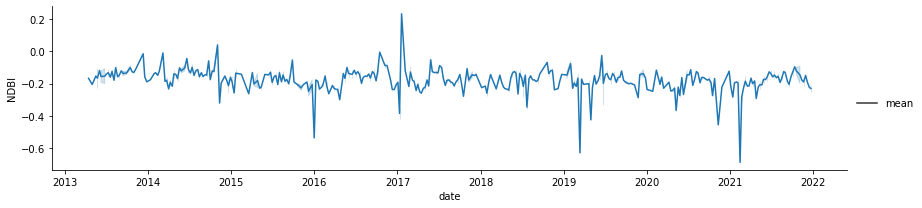

In [51]:
g = sns.FacetGrid(tsPandas,height = 3,aspect = 4)
g.map_dataframe(sns.lineplot,x = 'date',y = 'NDBI',style = 'reducer')
g.add_legend()